<a href="https://colab.research.google.com/github/Arimoro2020/Natural-Language-Processing-NLP-with-Disaster-Tweets/blob/main/01_Feature_Engineering_Natural_Language_Processing_with_Disaster_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mount Drive**

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import Pandas and Numpy Libraries**

In [41]:
import pandas as pd
import numpy as np

**Load Training Tweets**

In [42]:
train_tweets = pd.read_csv('/content/drive/MyDrive/PTDataScience/Project2/NLP/train.csv')
train_tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [43]:
train_tweets.shape

(7613, 5)

**Drop Irrelevant Columns**

In [44]:
train_tweets.drop(columns=['keyword', 'location'], axis=1, inplace=True)
train_tweets.head()

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1


**Load Testing Tweets**



In [45]:
test_tweets = pd.read_csv('/content/drive/MyDrive/PTDataScience/Project2/NLP/test.csv')
test_tweets.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [46]:
test_tweets.shape

(3263, 4)

**Drop Irrelevant Columns**

In [47]:
test_tweets.drop(columns=['keyword', 'location'], axis=1, inplace=True)
test_tweets.head()

,id,text
0,0,Just happened a terrible car crash
1,2,"Heard about #earthquake is different cities, s..."
2,3,"there is a forest fire at spot pond, geese are..."
3,9,Apocalypse lighting. #Spokane #wildfires
4,11,Typhoon Soudelor kills 28 in China and Taiwan


**Feature Engineering: Create Tweet Length Column**

In [48]:
train_tweets['text_len'] = train_tweets['text'].apply(lambda x: len(x) - x.count(' '))
train_tweets.head()

,id,text,target,text_len
0,1,Our Deeds are the Reason of this #earthquake M...,1,57
1,4,Forest fire near La Ronge Sask. Canada,1,32
2,5,All residents asked to 'shelter in place' are ...,1,112
3,6,"13,000 people receive #wildfires evacuation or...",1,57
4,7,Just got sent this photo from Ruby #Alaska as ...,1,72


**Feature Engineeing: Percentage of Punctuation Column**

Import string Library

In [49]:
import string

Function to create % of Punctuation Coulumn

In [50]:
def count_punc(message):
  count = sum([1 for char in message if char in string.punctuation])
  return round(count/(len(message) - message.count(' ')), 3) * 100

Apply the Function To the Text Column

In [51]:
train_tweets['%punc'] = train_tweets['text'].apply(lambda x: count_punc(x))
train_tweets.head()

,id,text,target,text_len,%punc
0,1,Our Deeds are the Reason of this #earthquake M...,1,57,1.8
1,4,Forest fire near La Ronge Sask. Canada,1,32,3.1
2,5,All residents asked to 'shelter in place' are ...,1,112,2.7
3,6,"13,000 people receive #wildfires evacuation or...",1,57,3.5
4,7,Just got sent this photo from Ruby #Alaska as ...,1,72,2.8


**Evaluate Created Features**

In [52]:
from matplotlib import pyplot

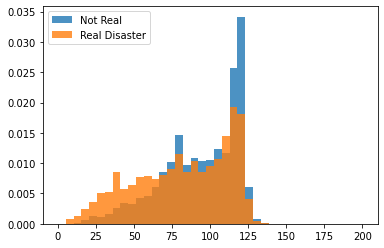

In [53]:
bins = np.linspace(0, 200, 40)

pyplot.hist(train_tweets[train_tweets['target'] == 1]['text_len'],bins, density=True, alpha=0.8,label='Not Real')
pyplot.hist(train_tweets[train_tweets['target'] == 0]['text_len'],bins, density=True, alpha=0.8, label='Real Disaster')
pyplot.legend(loc='upper left')
pyplot.show()

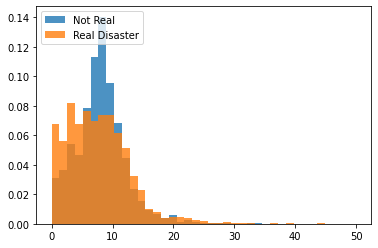

In [54]:
bins = np.linspace(0, 50, 40)

pyplot.hist(train_tweets[train_tweets['target'] == 1]['%punc'],bins, alpha=0.8,density=True, label='Not Real')
pyplot.hist(train_tweets[train_tweets['target'] == 0]['%punc'],bins, alpha=0.8, density=True, label='Real Disaster')
pyplot.legend(loc='upper left')
pyplot.show()

Plot the Two Features to Check the Distribution 

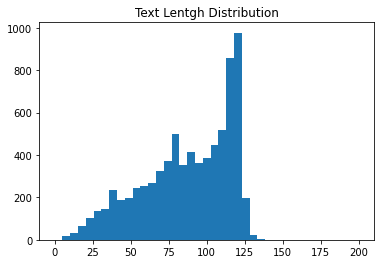

In [55]:
bins = np.linspace(0, 200, 40)
pyplot.hist(train_tweets['text_len'], bins)
pyplot.title('Text Lentgh Distribution')
pyplot.show()

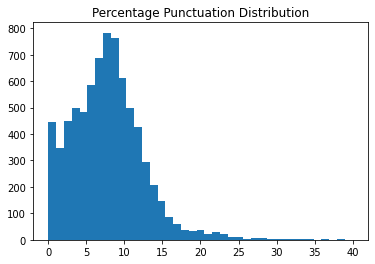

In [56]:
bins = np.linspace(0, 40, 40)
pyplot.hist(train_tweets['%punc'], bins)
pyplot.title('Percentage Punctuation Distribution')
pyplot.show()

**Transformation**

Check For The Appropriate Transformation to Use

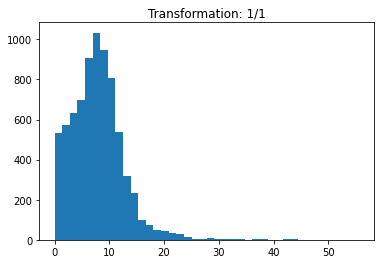

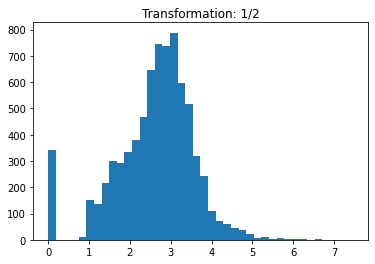

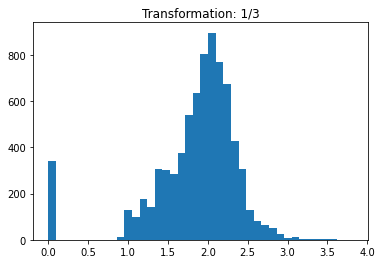

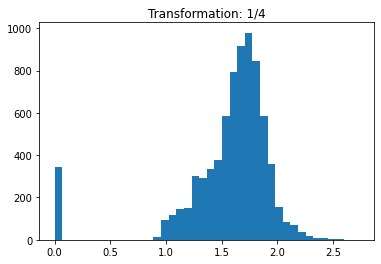

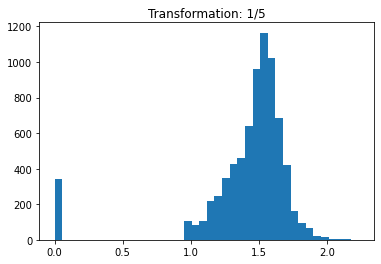

In [57]:
for i in [1,2,3,4,5]:
  pyplot.hist((train_tweets['%punc'])**(1/i), bins=40)
  pyplot.title("Transformation: 1/{}".format(str(i)))
  pyplot.show()

Apply transformation **1/5 to '%punc' 

In [58]:
def transf_ppunc(perc):
  n_ppunc = (perc) ** (1/5)
  return n_ppunc

In [59]:
train_tweets['t_%punc'] = train_tweets['%punc'].apply(lambda x: transf_ppunc(x))
train_tweets.head()

,id,text,target,text_len,%punc,t_%punc
0,1,Our Deeds are the Reason of this #earthquake M...,1,57,1.8,1.124746
1,4,Forest fire near La Ronge Sask. Canada,1,32,3.1,1.253927
2,5,All residents asked to 'shelter in place' are ...,1,112,2.7,1.219755
3,6,"13,000 people receive #wildfires evacuation or...",1,57,3.5,1.284735
4,7,Just got sent this photo from Ruby #Alaska as ...,1,72,2.8,1.228660


Create A cross Feature  as 'text_len' * 't_%punc'

In [60]:
train_tweets['x_feature'] = np.nan
train_tweets.head()

,id,text,target,text_len,%punc,t_%punc,x_feature
0,1,Our Deeds are the Reason of this #earthquake M...,1,57,1.8,1.124746,NaN
1,4,Forest fire near La Ronge Sask. Canada,1,32,3.1,1.253927,NaN
2,5,All residents asked to 'shelter in place' are ...,1,112,2.7,1.219755,NaN
3,6,"13,000 people receive #wildfires evacuation or...",1,57,3.5,1.284735,NaN
4,7,Just got sent this photo from Ruby #Alaska as ...,1,72,2.8,1.228660,NaN


In [61]:
train_tweets['x_feature'] = train_tweets['text_len'] * train_tweets['t_%punc']
train_tweets.head()

,id,text,target,text_len,%punc,t_%punc,x_feature
0,1,Our Deeds are the Reason of this #earthquake M...,1,57,1.8,1.124746,64.110528
1,4,Forest fire near La Ronge Sask. Canada,1,32,3.1,1.253927,40.125672
2,5,All residents asked to 'shelter in place' are ...,1,112,2.7,1.219755,136.612606
3,6,"13,000 people receive #wildfires evacuation or...",1,57,3.5,1.284735,73.229904
4,7,Just got sent this photo from Ruby #Alaska as ...,1,72,2.8,1.228660,88.463497


**Save DataFrame with Feature Engineering in Excel for Use in NLP & Data Cleaning in Diffrent Collab**

In [62]:
train_tweets.to_excel('/content/drive/MyDrive/PTDataScience/Project2/NLP/NLP2/feature.xlsx', index=False)